# **Predicting and Classifying with Regularized Regression Models**

# **Part 1 – Regression (Linear, Lasso, Ridge)**

In [25]:
# 1-Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder , StandardScaler 
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [26]:
# 2-Load Dataset
data = pd.read_csv("D:\DEPI3\Machine Learning\House Prices.csv")
data.head()

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\DELL\AppData\Local\Temp\ipykernel_816\3296804084.py:2: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv("D:\DEPI3\Machine Learning\House Prices.csv")


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1.Exploratory Data Analysis

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [29]:
# Handling missing value 
# Fill numeric columns with median, categorical with mode
for col in data.select_dtypes(include=np.number).columns:
    data[col] = data[col].fillna(data[col].median())

for col in data.select_dtypes(exclude=np.number).columns:
    data[col] = data[col].fillna(data[col].mode()[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [30]:
# Encode categorical features (OneHotEncodeing)
data = pd.get_dummies(data,drop_first=True)
onehotencoder = OneHotEncoder()
encoded_columns = onehotencoder.fit_transform(data)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


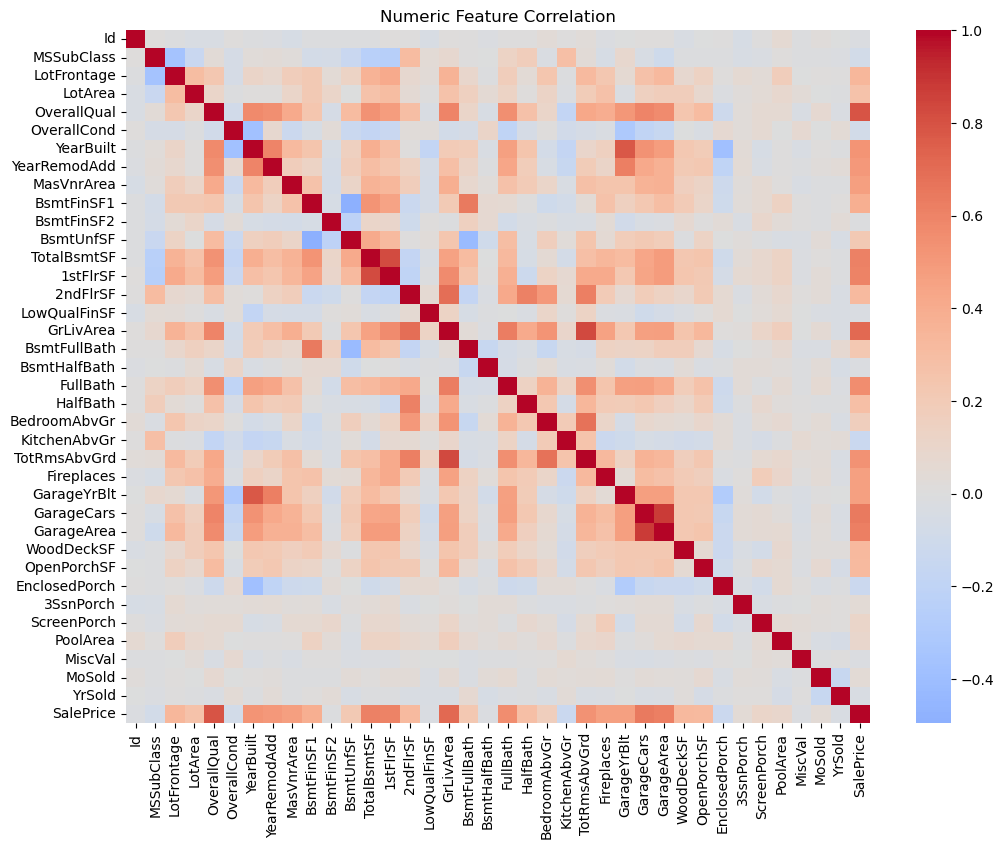

In [31]:
# Visualize correlations and detect multicollinearity
num_cols = data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12,9))
sns.heatmap(data[num_cols].corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Numeric Feature Correlation")
plt.show()

# 2.Model Building & Evaluation

In [32]:
X = data.drop(columns=["Id","SalePrice"])
y = data["SalePrice"]

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [33]:
# Train Linear Regression, Lasso, and Ridge models.
# Report RMSE, MAE, and R² scores for each model and α value.
def eval_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return{
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }
results = {}
results["Linear"] = eval_model(LinearRegression(), X_train, X_test, y_train, y_test)

#Try at least three different values for α (lambda) in Lasso and Ridge.
for alpha in [0.01 , 0.1 , 1.10] :
    results[f"Lasso α  ={alpha}"] = eval_model(Lasso(alpha=alpha, max_iter=10000),X_train,X_test,y_train,y_test)
    results[f"Ridge α  ={alpha}"] = eval_model(Ridge(alpha=alpha, max_iter=10000),X_train,X_test,y_train,y_test)

pd.DataFrame(results)

c:\Users\DELL\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.296e+08, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\DELL\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.382e+08, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


,Linear,Lasso α =0.01,Ridge α =0.01,Lasso α =0.1,Ridge α =0.1,Lasso α =1.1,Ridge α =1.1
RMSE,6.403852e+14,50629.516816,50556.418715,50611.401311,50162.076680,50458.355266,46688.530971
MAE,4.712078e+14,23106.345386,23071.803503,23096.402259,22970.202195,23022.844194,22123.183089
R2,-5.346490e+19,0.665810,0.666774,0.666049,0.671952,0.668066,0.715811


# 3.Challenge Extension

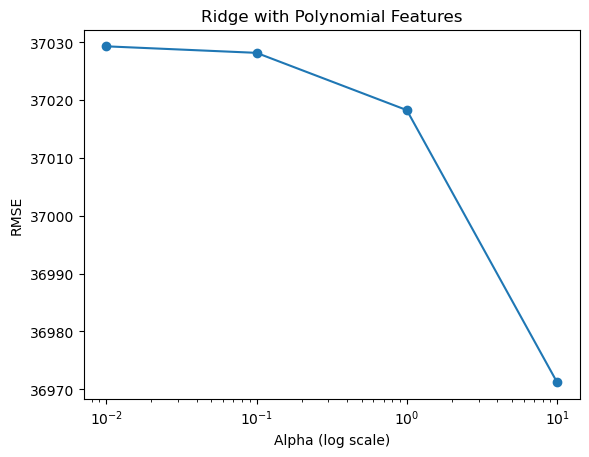

In [34]:
# Create polynomial features and see how regularization affects overfitting.
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge_scores = []
for alpha in [0.01, 0.1, 1, 10]:
    model = Ridge(alpha=alpha)
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    ridge_scores.append((alpha, np.sqrt(mean_squared_error(y_test, y_pred))))

# Plot model performance for each α value.

plt.plot([a for a,_ in ridge_scores], [rmse for _,rmse in ridge_scores], marker="o")
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("RMSE")
plt.title("Ridge with Polynomial Features")
plt.show()

## Short Report — Regularization Insights

- **House Prices Regression**:
  - Linear regression fits well but may overfit and suffer from multicollinearity.
  - Ridge (L2) reduces coefficient variance without eliminating features.
  - Lasso (L1) performs feature selection by driving some coefficients to zero.
  - Polynomial features + regularization help control overfitting.